# テキストデータの処理
テキストデータは文字列と構成され、長さはまちまちである。
このデータを機械学習アルゴリズムに適応する前に処理する必要がある
テキストデータは大きく以下4つに分けることができる
- カテゴリデータ
- 意味的にはカテゴリに分類できる自由に書かれた文字列
- 構造化された文字列
- テキストデータ

最も単純で効率が良く、機械学習で広く用いられているテキストデータ表現がBoW(bag-of-words)表現である。
この表現では、章立て、パラグラフ、文章、フォーマットなどの入力テキストの持つ構造のほとんど全てが失われ、コーパスに現れた単語がテキストに現れる回数だけが数えられる。
手順
1. トークン分割
ここの文書を単語に分割する
2. ボキャブラリ構築
全ての文書に現れる単語をボキャブラリとして集め、番号をつける
3. エンコード
ここの文書に対してボキャブラリの単語が現れる回数を数える。

*意味のない単語を拾わない様に最低2回以上登場するなどmin_dfを設定してあげると良い

In [3]:
! wget -nc http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data
! tar xzf data/aclImdb_v1.tar.gz --skip-old-files -C data

--2021-11-16 20:12:46--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
ai.stanford.edu (ai.stanford.edu) をDNSに問いあわせています... 171.64.68.10
ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 84125825 (80M) [application/x-gzip]
`data/aclImdb_v1.tar.gz' に保存中

aclImdb_v1.tar.gz   100%[===================>]  80.23M  3.21MB/s 時間 94s        

2021-11-16 20:14:21 (870 KB/s) - `data/aclImdb_v1.tar.gz' へ保存完了 [84125825/84125825]

tar: Option --skip-old-files is not supported
Usage:
  List:    tar -tf <archive-filename>
  Extract: tar -xf <archive-filename>
  Create:  tar -cf <archive-filename> [filenames...]
  Help:    tar --help


In [9]:
!tree -dL 2 data/aclImdb

data/aclImdb
├── test
│   ├── neg
│   └── pos
└── train
    ├── neg
    ├── pos
    └── unsup

7 directories


In [10]:
!rm -r data/aclImdb/train/unsup

In [11]:
from sklearn.datasets import load_files
reviews_train = load_files("data/aclImdb/train/")

text_train,y_train = reviews_train.data,reviews_train.target
print(type(text_train))
print(len(text_train))
print(text_train[6])

<class 'list'>
25000
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [12]:
text_train = [doc.replace(b"<br />", b"") for doc in text_train]

In [15]:
import numpy as np
print(np.bincount(y_train))

[12500 12500]


In [18]:
reviews_test = load_files("data/aclImdb/test/")
text_test,y_test = reviews_test.data,reviews_test.target
print(len(text_test))
print(np.bincount(y_test))
text_test = [doc.replace(b"<br />",b"")for doc in text_test]

25000
[12500 12500]


In [19]:
bards_words = ["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)


CountVectorizer()

In [21]:
print(len(vect.vocabulary_))
print((vect.vocabulary_))

13
{'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [22]:
bag_of_words = vect.transform(bards_words)
print(repr(bag_of_words))

<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [23]:
print(bag_of_words.toarray())

[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [24]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))

<25000x75911 sparse matrix of type '<class 'numpy.int64'>'
	with 3431163 stored elements in Compressed Sparse Row format>


In [26]:
feature_names = vect.get_feature_names()
print(len(feature_names))
print(feature_names[:20])
print(feature_names[20010:20030])
print(feature_names[::2000])

75911
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
['doppelgangers', 'doppelgänger', 'dopplebangers', 'doppleganger', 'doppler', 'dopy', 'doqui', 'dor', 'dora', 'dorado', 'dorama', 'doran', 'dorcas', 'dorcey', 'dorday', 'dore', 'doreen', 'doremus', 'doren', 'dorf']
['00', 'adultery', 'appearence', 'bang', 'blissfully', 'burress', 'chaulk', 'compensations', 'crossfire', 'derboiler', 'dop', 'empty', 'falling', 'formats', 'gisbourne', 'hallucinogenics', 'honore', 'inferenced', 'johnston', 'laconic', 'looping', 'matlin', 'modelling', 'nerdish', 'orion', 'periphery', 'preached', 'raha', 'resolving', 'salli', 'shaffer', 'smurfs', 'stereotypic', 'synchronized', 'tirard', 'una', 'venantini', 'whycome']


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(max_iter=100000
                                    ), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.88


In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(), param_grid,cv=5)
grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

0.88896
{'C': 0.1}


/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
X_test = vect.transform(text_test)
print(grid.score(X_test,y_test))

0.87808


In [36]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))

<25000x27264 sparse matrix of type '<class 'numpy.int64'>'
	with 3352876 stored elements in Compressed Sparse Row format>


In [38]:
feature_names = vect.get_feature_names()
print(feature_names[:50])
print(feature_names[20010:20030])
print(feature_names[::700])

['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
['repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayed', 'replaying', 'replays', 'replete', 'replica', 'replicas', 'replicate', 'replied', 'replies']
['00', 'affectionate', 'appropriate', 'barbet', 'blur', 'butch', 'cheery', 'commit', 'courtroom', 'deconstruct', 'disgraceful', 'dvr', 'escort', 'fella', 'freezing', 'gorillas', 'havana', 'hunk', 'insist', 'juice', 'left', 'mafia', 'met', 'musicals', 'occult', 'parliament', 'pleasence', 'prop', 'recites', 'revisionist', 'sassy', 'shedding', 'sniff', 'stems', 'swear', 'thugs', 'tween', 'vanish', 'whale'

/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
grid = GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(X_train,y_train)
print(grid.best_score_)

/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

0.8881600000000001


/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# ストップワード
役に立たない単語を取り除くもう一つの方法として、あまりに頻出するため役に立たない単語がある。
1. 言語固有のストップワードリストを作っておく
2. 頻度の高い単語を捨てる

In [40]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(len(ENGLISH_STOP_WORDS))
print(list(ENGLISH_STOP_WORDS))

318
['she', 'most', 'am', 'it', 'what', 'part', 'before', 'five', 'side', 'everything', 'another', 'where', 'fire', 'always', 'get', 'would', 'mill', 'next', 'top', 'ltd', 'him', 'nowhere', 'may', 'so', 'thereby', 'elsewhere', 'nobody', 'by', 'their', 'few', 'down', 'under', 'find', 'for', 'ten', 'amount', 'eg', 'myself', 'herein', 'well', 'latterly', 'has', 'describe', 'hers', 'somehow', 'but', 'twenty', 'this', 'seemed', 'once', 'meanwhile', 'in', 'are', 'we', 'several', 'least', 'sometimes', 'please', 'onto', 'first', 'such', 'could', 'call', 'within', 'those', 'and', 'amoungst', 'he', 'there', 're', 'whose', 'along', 'thereafter', 'third', 'was', 'out', 'is', 'my', 'how', 'they', 'anyway', 'our', 'now', 'serious', 'etc', 'with', 'something', 'hereafter', 'yet', 'bill', 'cannot', 'be', 'never', 'hereupon', 'two', 'made', 'thereupon', 'even', 'no', 'upon', 'therefore', 'also', 'at', 'a', 'more', 'cant', 'yourself', 'nine', 'from', 'hereby', 'the', 'ourselves', 'perhaps', 'after', 'yo

In [41]:
vect = CountVectorizer(min_df=5,stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))

<25000x26959 sparse matrix of type '<class 'numpy.int64'>'
	with 2149073 stored elements in Compressed Sparse Row format>


In [44]:
grid_search = GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid_search.fit(X_train,y_train)
print(grid_search.best_score_)

/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

0.88296


/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# tf-idfを用いたデータのスケール変換
特徴量がどの程度情報を持っていそうかに応じて、特徴量のスケールを変換する手法。
特定の文書に頻出し、他の文書にあまり現れない単語は、その文書の内容をよく示している。
=> 特定の文書にだけ頻出する単語の重みを大きくする

tfidf(w,d) = tf(log(N+1/Nw+1)+1)
*N:訓練セットと中の文書の数
N2:訓練セット中のwが現れる文書の数

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                     LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Best cross-validation score: 0.89


/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(text_train)

max_value = X_train.max(axis=0).toarray().ravel()
sorted_byidf = max_value.argsort()

feature_names = np.array(vectorizer.get_feature_names())
print(feature_names[sorted_byidf[:20]])
print(feature_names[sorted_byidf[-20:]])

[20.15985557 34.37105041 16.70816476 ... 25.46284132 28.0047349
  9.33491163]
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'avoided'
 'fond' 'stinker' 'emphasis' 'commented' 'disappoint' 'realizing'
 'downhill' 'inane']
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur'
 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria'
 'khouri' 'zizek' 'rob' 'timon' 'titanic']


In [54]:
sorted_by_idf =  np.argsort(vectorizer.idf_)
print(feature_names[sorted_by_idf[:100]])

['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


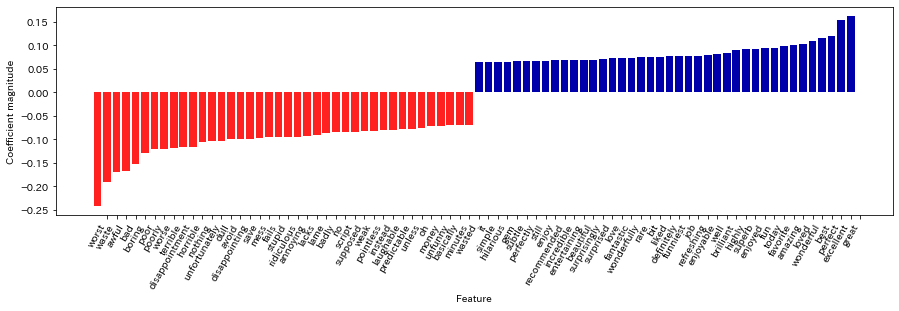

In [56]:
import mglearn
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names, n_top_features=40)

In [57]:
print(bards_words)

['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


# トークンの列の長さを変える
長さ1:ユニグラム
2: バイグラム
3: トリグラム

In [62]:
cv = CountVectorizer(ngram_range=(1,1)).fit(bards_words)
print(len(cv.vocabulary_))
print(cv.get_feature_names())

13
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [63]:
cv.transform(bards_words).toarray()

array([[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]])

In [66]:
cv = CountVectorizer(ngram_range=(1,3)).fit(bards_words)
print(len(cv.vocabulary_))
print(cv.get_feature_names())

39
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [67]:
pipe = make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression())
param_grid = {'logisticregression__C':[0.001,0.01,0.1,1,10,100],
             "tfidfvectorizer__ngram_range":[(1,1),(1,2),(1,3)]}

grid = GridSearchCV(pipe,param_grid,cv=5)
grid.fit(text_train,y_train)
print(grid.best_score_)
print(grid.best_params_)


KeyboardInterrupt: 

In [ ]:
scores = grid.cv_results['mean_test_score'].reshape(-1,3).T
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

In [ ]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)
plt.ylim(-22, 22)

In [68]:
vect = CountVectorizer(max_features=10000,max_df=.15)
X = vect.fit_transform(text_train)

In [73]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)
# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once
document_topics = lda.fit_transform(X)

In [74]:
lda.components_.shape

(10, 10000)

In [75]:
sortig  = np.argsort(lda.components_,axis=1)[:,::-1]
feature_names = np.array(vect.get_feature_names())

/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [76]:
# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

NameError: name 'sorting' is not defined